NOTE: Dataset all_energy_statistics is a sample. For the full dataset please visit Kaggle and download the International Energy Statistics dataset(link in the references below).

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# International greenhouse gas emissions and energy efficiency trends for the period 1990 - 2014
## An exploration of GDP, population, GHG emissions and energy consumption

### Author: Aleksandar Vladimirov

06/09/2019

Abstract

Global warming, reduction greenhouse gas emissoins and how the world should change in order to preserve a future for the next generations are hot topics. If you're interested in the sustainability of our climate and nature, while being ecnomically well off and you're curious to find out which countries do best when those factors are combined - then this paper is for you.

Table of content:
1. Introduction
2. Importing and reading the data 
3. Data Preprocessing  
    3.1 Cleaning and choosing columns to work with  
    3.2 Feature engineering
4. Exploratory Data Analysis (EDA)  
    4.1 Correlations
    4.2 Data without energy consumption
    4.3 Data with energy consumption
5. Conclusion
6. References

## 1. Introduction

Climate change, greenhouse emissions and energy efficiency have become really important topics. And while there's the clear need for a change when you combine the desire of every human being to live better in a cleaner (less GHG emissions), more efficient world (energy consumption) the task get harder when you account that every person wants to achieve that while being better off economically (GDP per capita).

The aim of this paper is to find out the most energy efficient countries which the rest of the world should look to and try to emulate.


For the purpose of this project I'm going to use 5 different datasets: 

1. "GDP_countries" - GDP per capita at current prices in USD from United Nations(UN)
2. "population_countries" - Population data from UN
3. "historical_emissions" - All greenhouse gas data from Climatewatch.org  
4. "all_energy_statistics" - International Energy Statistics from Kaggle pulled from United Nations Statistics Devision's 
5. "supply_of_energy" - Energy production, trade and consumption of UN

Similar research has been done in the past. Two example are published on sciencedirect.com by Ramakrishnan Ramanathan and B.W. Ang. For more information please check the references.

## 2. Importing and Reading the Data

In [3]:
gdp_data = pd.read_csv("data/GDP_countries.csv")
population_data = pd.read_csv("data/population_countries.csv")
ghg_emissions_data = pd.read_csv("data/historical_emissions.csv")
world_energy_stats = pd.read_csv("data/all_energy_statistics.csv")
energy_supply = pd.read_csv("data/supply_of_energy.csv", encoding = "ISO-8859-1")

Let's see how those datasets look like checking the columns for each set, their shape and data types which will determine which sets/columns need to be further preprocessed.

In [4]:
gdp_data.head()

,Country/Area,Year,Unit,Gross Domestic Product (GDP)
0,Afghanistan,1990,US$,3621600007.157436
1,Afghanistan,1991,US$,3340100005.150091
2,Afghanistan,1992,US$,3474600006.811256
3,Afghanistan,1993,US$,2664399991.6472635
4,Afghanistan,1994,US$,2114600000.2314816


In [5]:
gdp_data.shape

(6250, 4)

In [6]:
gdp_data.dtypes

Country/Area                    object
Year                             int64
Unit                            object
Gross Domestic Product (GDP)    object
dtype: object

GDP will have to be fixed, names of the columns fixed.

In [7]:
population_data.head(5)

,Country/Area,Year,Unit,Population
0,Afghanistan,1990,Persons,12249114
1,Afghanistan,1991,Persons,12993657
2,Afghanistan,1992,Persons,13981231
3,Afghanistan,1993,Persons,15095099
4,Afghanistan,1994,Persons,16172719


In [8]:
population_data.shape

(5500, 4)

In [9]:
population_data.dtypes

Country/Area    object
Year             int64
Unit            object
Population      object
dtype: object

Population will need to be fixed in a similar manner.

In [10]:
ghg_emissions_data.head()

,Country,Data source,Sector,Gas,Unit,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,All GHG,MtCO₂e,48892.37,48257.30,47583.61,47025.97,45760.96,...,36212.69,36299.09,36626.68,35376.05,34922.08,34231.54,34051.21,33927.96,34008.49,33823.47
1,China,CAIT,Total including LUCF,All GHG,MtCO₂e,11600.63,11420.44,10938.67,10701.13,9712.78,...,3972.81,4038.55,3931.79,3900.32,3884.03,3498.95,3344.47,3117.42,2980.93,2833.49
2,United States,CAIT,Total including LUCF,All GHG,MtCO₂e,6319.02,6213.27,6132.14,6305.16,6115.68,...,6222.57,6178.27,6160.30,6013.18,5863.02,5805.98,5725.24,5598.11,5514.88,5550.04
3,India,CAIT,Total including LUCF,All GHG,MtCO₂e,3202.31,3031.34,2956.22,2821.64,2469.00,...,1594.49,1516.44,1485.84,1429.29,1375.25,1311.29,1263.72,1230.04,1197.94,1142.43
4,Indonesia,CAIT,Total including LUCF,All GHG,MtCO₂e,2471.64,2160.98,2156.54,2135.19,1994.78,...,1393.40,1498.99,2259.06,1308.49,1435.23,1401.19,1386.03,1371.11,1352.78,1336.74


In [11]:
ghg_emissions_data.shape

(192, 30)

In [12]:
ghg_emissions_data.dtypes

Country         object
Data source     object
Sector          object
Gas             object
Unit            object
2014           float64
2013           float64
2012           float64
2011           float64
2010           float64
2009           float64
2008           float64
2007           float64
2006           float64
2005           float64
2004           float64
2003           float64
2002           float64
2001           float64
2000           float64
1999           float64
1998           float64
1997           float64
1996           float64
1995           float64
1994           float64
1993           float64
1992           float64
1991           float64
1990           float64
dtype: object

In [13]:
world_energy_stats.head()

,Unnamed: 0,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,536037,Estonia,From combustible fuels – Main activity,2002,Terajoules,24717.0,NaN,heat
1,705920,Hungary,Lubricants - Transfers and recycled products,2005,"Metric tons, thousand",0.0,NaN,lubricants
2,313067,Uzbekistan,Fuel oil - production from refineries,1994,"Metric tons, thousand",1314.0,NaN,fuel_oil
3,1178585,Brazil,White spirit and special boiling point industr...,1991,"Metric tons, thousand",0.0,NaN,white_spirit_and_special_boiling_point_industr...
4,575575,Germany,Industrial Waste - Transformation in heat plan...,2008,Terajoules,10057.0,NaN,industrial_waste


In [14]:
world_energy_stats.shape

(1000, 8)

In [15]:
world_energy_stats.dtypes

Unnamed: 0                 int64
country_or_area           object
commodity_transaction     object
year                       int64
unit                      object
quantity                 float64
quantity_footnotes       float64
category                  object
dtype: object

Quantity_footnotes will have to be investigater further.

## 3. Data Preprocessing

### 3.1 Cleaninig and choosing columns to work with

For the GDP data I'd like to change the name of the GDP column. But first I'm going to check if all units are in US$ and check the GDP column for missing data. But first will do some renaming.

In [16]:
gdp_data.rename(columns={"Country/Area":"country_or_area", "Year":"year", "Unit":"unit",
                         "Gross Domestic Product (GDP)":"gdp_usd"}, inplace = True)

In [17]:
gdp_data.unit.unique()

array(['US$', '...'], dtype=object)

In [18]:
gdp_data[gdp_data.unit == "..."]

,country_or_area,year,unit,gdp_usd
1425,Curaçao,1990,...,...
1426,Curaçao,1991,...,...
1427,Curaçao,1992,...,...
1428,Curaçao,1993,...,...
1429,Curaçao,1994,...,...
1430,Curaçao,1995,...,...
1431,Curaçao,1996,...,...
1432,Curaçao,1997,...,...
1433,Curaçao,1998,...,...
1434,Curaçao,1999,...,...


It appears we have missing values so I'm curious to see for which countries.

In [19]:
missing_gdp_data = gdp_data[gdp_data.unit == '...']

In [20]:
missing_gdp_data.country_or_area.unique()

array(['Curaçao', 'Former Czechoslovakia', 'Former Ethiopia',
       'Former Netherlands Antilles', 'Former Sudan', 'Former USSR',
       'Former Yugoslavia', 'Sint Maarten (Dutch part)', 'South Sudan',
       'Sudan', 'Yemen: Former Democratic Yemen',
       'Yemen: Former Yemen Arab Republic'], dtype=object)

Since I can see the major of those are former states I will check if there are any current equivalents in the original gdp_data.

In [21]:
gdp_data.country_or_area.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Americas',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia',
       'Australia and New Zealand', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean',
       'Cayman Islands', 'Central African Republic', 'Central America',
       'Central Asia', 'Chad', 'Chile', 'China, Hong Kong SAR',
       'China, Macao Special Administrative Region',
       "China, People's Republic of", 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Côte d'Ivoi

Curaçao, Former Netherlands Antilles, Sint Maarten (Dutch part) are small island nations/autonomous regions with insignificant population/GDP (after quick google check).
Czechoslovakia and Former Yemen exist as current countries(Czechia and Yemen). USSR doesn't.
For Sudan the case is a bit more interesting - in 2005 the civil war ended and in 2008 the GPD calculations for Former Sudan were split between Sudan and South Sudan, therefore till 2008 the country is "Former Sudan" while 2008 onwards there are South Sudan and Sudan (as shown below). Interestingly enough official independence was gained in 2011 (after quick google search) and this has a result for next dataset - the one for the population.

In [22]:
gdp_data[(gdp_data["country_or_area"].str.contains("Sudan")) & (gdp_data["unit"] == "US$")]

,country_or_area,year,unit,gdp_usd
2075,Former Sudan,1990,US$,12637465293.584476
2076,Former Sudan,1991,US$,11327849239.141048
2077,Former Sudan,1992,US$,12115514608.798815
2078,Former Sudan,1993,US$,12528649867.897085
2079,Former Sudan,1994,US$,11884304301.173971
2080,Former Sudan,1995,US$,12847187343.20496
2081,Former Sudan,1996,US$,8377204018.255106
2082,Former Sudan,1997,US$,10241121411.017347
2083,Former Sudan,1998,US$,10924153611.249563
2084,Former Sudan,1999,US$,10714222610.732826


I want to check if it's the same case for column gdp_usd.

In [23]:
gdp_data[gdp_data.gdp_usd == "..."].country_or_area.unique()

array(['Curaçao', 'Former Czechoslovakia', 'Former Ethiopia',
       'Former Netherlands Antilles', 'Former Sudan', 'Former USSR',
       'Former Yugoslavia', 'Sint Maarten (Dutch part)', 'South Sudan',
       'Sudan', 'Yemen: Former Democratic Yemen',
       'Yemen: Former Yemen Arab Republic'], dtype=object)

It's exactly the same countries. So the "..." fields are irrelevant and can be disregarded. Just a quick check if it's the same shape as well.

In [24]:
gdp_data[gdp_data.gdp_usd == "..."].shape

(219, 4)

In [25]:
gdp_data = gdp_data[gdp_data.gdp_usd != "..."]

Let's check if there's anything left.

In [26]:
gdp_data[gdp_data.gdp_usd == "..."]

,country_or_area,year,unit,gdp_usd


In [27]:
gdp_data.shape

(6031, 4)

In [28]:
gdp_data.dtypes

country_or_area    object
year                int64
unit               object
gdp_usd            object
dtype: object

The only thing left is to correct the type of gdp_usd.

In [29]:
gdp_data["gdp_usd"] = gdp_data["gdp_usd"].astype(float)

In [30]:
gdp_data.dtypes

country_or_area     object
year                 int64
unit                object
gdp_usd            float64
dtype: object

A quick sense check below.

In [31]:
gdp_data[gdp_data.country_or_area == "Bulgaria"].gdp_usd.sum()

704325494756.2268

Now let's see how we can manage the second data set for the population. Again we start with the column names.

In [32]:
population_data.head()

,Country/Area,Year,Unit,Population
0,Afghanistan,1990,Persons,12249114
1,Afghanistan,1991,Persons,12993657
2,Afghanistan,1992,Persons,13981231
3,Afghanistan,1993,Persons,15095099
4,Afghanistan,1994,Persons,16172719


In [33]:
population_data.rename(columns={"Country/Area":"country_or_area", "Year":"year", "Unit":"unit",
                         "Population":"population"}, inplace = True)

Since the dataset is donwloaded from the same database I expect the same trend of missing data. Let's check it.

In [34]:
population_data[population_data.population == "..."].country_or_area.unique()

array(['Former Czechoslovakia', 'Former Ethiopia',
       'Former Netherlands Antilles', 'Former Sudan', 'Former USSR',
       'Former Yugoslavia', 'Yemen: Former Democratic Yemen',
       'Yemen: Former Yemen Arab Republic'], dtype=object)

Intrestingly enough there are no missing values for Sint Maarten (Dutch part) and for some of the Sudans... Let's see.

In [35]:
population_data[(population_data["country_or_area"].str.contains("Sudan")) & (population_data["unit"] == "Persons")]

,country_or_area,year,unit,population
1800,Former Sudan,1990,Persons,25916071
1801,Former Sudan,1991,Persons,26599003
1802,Former Sudan,1992,Persons,27301290
1803,Former Sudan,1993,Persons,28026852
1804,Former Sudan,1994,Persons,28779623
1805,Former Sudan,1995,Persons,29562505
1806,Former Sudan,1996,Persons,30377304
1807,Former Sudan,1997,Persons,31224457
1808,Former Sudan,1998,Persons,32103465
1809,Former Sudan,1999,Persons,33012906


It appears it's way easier to split the census data regionally than the GDP. Apparently after the independence of South Sudan in the beginnig of 2011 they managed go back and split the population retroactively.

In [36]:
population_data[(population_data["country_or_area"].str.contains("Sint")) & (population_data["unit"] == "Persons")]

,country_or_area,year,unit,population
4400,Sint Maarten (Dutch part),1990,Persons,28549
4401,Sint Maarten (Dutch part),1991,Persons,29534
4402,Sint Maarten (Dutch part),1992,Persons,30090
4403,Sint Maarten (Dutch part),1993,Persons,30339
4404,Sint Maarten (Dutch part),1994,Persons,30471
4405,Sint Maarten (Dutch part),1995,Persons,30633
4406,Sint Maarten (Dutch part),1996,Persons,30853
4407,Sint Maarten (Dutch part),1997,Persons,31110
4408,Sint Maarten (Dutch part),1998,Persons,31374
4409,Sint Maarten (Dutch part),1999,Persons,31615


Out of curiosity I've checked Sint Maarten. As mentioned before - insignificant amounts and since we don't have GDP data for it so the population data will be removed as well.

In [37]:
population_data = population_data[(population_data.population != "...") 
                                  & (population_data.country_or_area != "Sint Maarten (Dutch part)")]

In [38]:
population_data.shape

(5328, 4)

Quick check if there's anything missed.

In [39]:
population_data.unit.unique()

array(['Persons'], dtype=object)

Now let's change the data type of the population column.

In [40]:
population_data["population"] = pd.to_numeric(population_data["population"])

In [41]:
population_data.dtypes

country_or_area    object
year                int64
unit               object
population          int64
dtype: object

And a quick head to see how things are looking.




In [42]:
population_data.head()

,country_or_area,year,unit,population
0,Afghanistan,1990,Persons,12249114
1,Afghanistan,1991,Persons,12993657
2,Afghanistan,1992,Persons,13981231
3,Afghanistan,1993,Persons,15095099
4,Afghanistan,1994,Persons,16172719


Now let's continue with the greenhouse gas emissions dataset.

In [43]:
ghg_emissions_data.head()

,Country,Data source,Sector,Gas,Unit,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,All GHG,MtCO₂e,48892.37,48257.30,47583.61,47025.97,45760.96,...,36212.69,36299.09,36626.68,35376.05,34922.08,34231.54,34051.21,33927.96,34008.49,33823.47
1,China,CAIT,Total including LUCF,All GHG,MtCO₂e,11600.63,11420.44,10938.67,10701.13,9712.78,...,3972.81,4038.55,3931.79,3900.32,3884.03,3498.95,3344.47,3117.42,2980.93,2833.49
2,United States,CAIT,Total including LUCF,All GHG,MtCO₂e,6319.02,6213.27,6132.14,6305.16,6115.68,...,6222.57,6178.27,6160.30,6013.18,5863.02,5805.98,5725.24,5598.11,5514.88,5550.04
3,India,CAIT,Total including LUCF,All GHG,MtCO₂e,3202.31,3031.34,2956.22,2821.64,2469.00,...,1594.49,1516.44,1485.84,1429.29,1375.25,1311.29,1263.72,1230.04,1197.94,1142.43
4,Indonesia,CAIT,Total including LUCF,All GHG,MtCO₂e,2471.64,2160.98,2156.54,2135.19,1994.78,...,1393.40,1498.99,2259.06,1308.49,1435.23,1401.19,1386.03,1371.11,1352.78,1336.74


First Data Source, Sector, Gas and Unit columns will be checked and if those do not bring any additional value will be removed. They don't bring any additional value since MtCO2e is million tons of carbon dioxide equivalent and LUCF means Land Use Change and Forestry. But before that the columns need some modifications.

In [44]:
ghg_emissions_data.rename(columns={"Country":"country_or_area", "Data source":"data_source", "Sector":"sector", "Gas":"gas", 
                                   "Unit":"unit"}, inplace = True)

In [45]:
ghg_emissions_data.head()

,country_or_area,data_source,sector,gas,unit,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,All GHG,MtCO₂e,48892.37,48257.30,47583.61,47025.97,45760.96,...,36212.69,36299.09,36626.68,35376.05,34922.08,34231.54,34051.21,33927.96,34008.49,33823.47
1,China,CAIT,Total including LUCF,All GHG,MtCO₂e,11600.63,11420.44,10938.67,10701.13,9712.78,...,3972.81,4038.55,3931.79,3900.32,3884.03,3498.95,3344.47,3117.42,2980.93,2833.49
2,United States,CAIT,Total including LUCF,All GHG,MtCO₂e,6319.02,6213.27,6132.14,6305.16,6115.68,...,6222.57,6178.27,6160.30,6013.18,5863.02,5805.98,5725.24,5598.11,5514.88,5550.04
3,India,CAIT,Total including LUCF,All GHG,MtCO₂e,3202.31,3031.34,2956.22,2821.64,2469.00,...,1594.49,1516.44,1485.84,1429.29,1375.25,1311.29,1263.72,1230.04,1197.94,1142.43
4,Indonesia,CAIT,Total including LUCF,All GHG,MtCO₂e,2471.64,2160.98,2156.54,2135.19,1994.78,...,1393.40,1498.99,2259.06,1308.49,1435.23,1401.19,1386.03,1371.11,1352.78,1336.74


In [46]:
ghg_emissions_data.data_source.unique()

array(['CAIT'], dtype=object)

In [47]:
ghg_emissions_data.sector.unique()

array(['Total including LUCF'], dtype=object)

In [48]:
ghg_emissions_data.unit.unique()

array(['MtCO₂e'], dtype=object)

In [49]:
ghg_emissions_data.gas.unique()

array(['All GHG'], dtype=object)

In [50]:
ghg_emissions_data = ghg_emissions_data.drop(["data_source", "sector", "gas", "unit"], axis = 1)

In [51]:
ghg_emissions_data.head()

,country_or_area,2014,2013,2012,2011,2010,2009,2008,2007,2006,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,48892.37,48257.30,47583.61,47025.97,45760.96,44091.45,44206.56,43822.88,42805.12,...,36212.69,36299.09,36626.68,35376.05,34922.08,34231.54,34051.21,33927.96,34008.49,33823.47
1,China,11600.63,11420.44,10938.67,10701.13,9712.78,8919.70,8359.26,8176.56,7537.67,...,3972.81,4038.55,3931.79,3900.32,3884.03,3498.95,3344.47,3117.42,2980.93,2833.49
2,United States,6319.02,6213.27,6132.14,6305.16,6115.68,5893.98,6253.79,6531.52,6330.06,...,6222.57,6178.27,6160.30,6013.18,5863.02,5805.98,5725.24,5598.11,5514.88,5550.04
3,India,3202.31,3031.34,2956.22,2821.64,2469.00,2363.59,2183.33,2083.95,1942.63,...,1594.49,1516.44,1485.84,1429.29,1375.25,1311.29,1263.72,1230.04,1197.94,1142.43
4,Indonesia,2471.64,2160.98,2156.54,2135.19,1994.78,2285.21,1968.89,1974.67,2399.72,...,1393.40,1498.99,2259.06,1308.49,1435.23,1401.19,1386.03,1371.11,1352.78,1336.74


In [52]:
# Will create melt function in case it's needed more than once and will remove not available values.
def melt_df(dataframe, value_name):
    dataframe.dropna(axis=0, inplace= True)
    melted_df = pd.melt(dataframe,
                       id_vars= "country_or_area",
                       var_name= "year",
                       value_name= value_name)
    return melted_df

In [53]:
emissions = melt_df(ghg_emissions_data, "mtco2e")

In [54]:
emissions.head()

,country_or_area,year,mtco2e
0,World,2014,48892.37
1,China,2014,11600.63
2,United States,2014,6319.02
3,India,2014,3202.31
4,Indonesia,2014,2471.64


In [55]:
emissions.dtypes

country_or_area     object
year                object
mtco2e             float64
dtype: object

In [56]:
emissions.country_or_area.unique()

array(['World', 'China', 'United States', 'India', 'Indonesia', 'Russia',
       'Brazil', 'Japan', 'Canada', 'Germany', 'Iran', 'Mexico',
       'South Korea', 'Saudi Arabia', 'South Africa', 'Australia',
       'United Kingdom', 'Nigeria', 'Argentina', 'Zambia', 'Thailand',
       'Italy', 'Turkey', 'Pakistan', 'Ukraine', 'Venezuela', 'France',
       'Poland', 'Iraq', 'Kazakhstan', 'Tanzania', 'Spain', 'Egypt',
       'Angola', 'Vietnam', 'Sudan', 'United Arab Emirates', 'Uzbekistan',
       'Myanmar', 'Democratic Republic of the Congo', 'Algeria', 'Kuwait',
       'Bangladesh', 'Cameroon', 'Malaysia', 'Paraguay', 'Colombia',
       'Netherlands', 'Peru', 'Ethiopia', 'Bolivia', 'Libya',
       'Philippines', 'Turkmenistan', 'Oman', 'Belgium', 'Czech Republic',
       'Ecuador', 'Belarus', 'Qatar', 'Israel', 'Greece', 'North Korea',
       'Morocco', 'Papua New Guinea', 'Austria', 'Mozambique', 'Mongolia',
       'Finland', 'Azerbaijan', 'Zimbabwe', 'Portugal', 'Syria',
       'Centr

In [57]:
# Correction for the data type of "year".
emissions["year"] = pd.to_numeric(emissions["year"])

Let's see the last dataframe. Since we're interested in the energy consumption according to the Energy-Questionnaire-Guidelines the column which we first need to go to is commodity_transaction column and filter to "Total energy supply".

In [58]:
world_energy_stats = world_energy_stats[world_energy_stats["commodity_transaction"].str.contains("Final energy consumption")]

In [59]:
world_energy_stats.shape

(53, 8)

In [60]:
#Since the data is combined from multiple dataset I expect it not to have a common unit of energy. Let's check it.
world_energy_stats.unit.unique()

array(['Metric tons,  thousand', 'Cubic metres, thousand', 'Terajoules',
       'Kilowatt-hours, million'], dtype=object)

In [61]:
world_energy_stats[world_energy_stats["unit"].str.contains("Metric tons")].head()

,Unnamed: 0,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
13,297620,United Rep. of Tanzania,Fuel oil - Final energy consumption,1995,"Metric tons, thousand",117.00,NaN,fuel_oil
32,680036,Bhutan,Liquified Petroleum Gas (LPG) - Final energy c...,2009,"Metric tons, thousand",6.17,1.0,liquified_petroleum_gas
64,34299,Jamaica,Bagasse - Final energy consumption,2010,"Metric tons, thousand",318.70,NaN,bagasse
108,439338,Gabon,Gas Oil/ Diesel Oil - Final energy consumption,1999,"Metric tons, thousand",221.00,NaN,gas_oil_diesel_oil
190,34051,Fiji,Bagasse - Final energy consumption,1990,"Metric tons, thousand",1050.00,1.0,bagasse


In [62]:
world_energy_stats.head()

,Unnamed: 0,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
13,297620,United Rep. of Tanzania,Fuel oil - Final energy consumption,1995,"Metric tons, thousand",117.000000,NaN,fuel_oil
32,680036,Bhutan,Liquified Petroleum Gas (LPG) - Final energy c...,2009,"Metric tons, thousand",6.170000,1.0,liquified_petroleum_gas
44,361289,Portugal,Fuelwood - Final energy consumption,1990,"Cubic metres, thousand",5173.026492,1.0,fuelwood
64,34299,Jamaica,Bagasse - Final energy consumption,2010,"Metric tons, thousand",318.700000,NaN,bagasse
67,200704,United Kingdom,Direct use of geothermal heat - Final energy c...,2009,Terajoules,33.000000,NaN,direct_use_of_geothermal_heat


In [63]:
#A quick sense check.
world_energy_stats.quantity[world_energy_stats["unit"].str.contains("Metric tons")].sum()

41863.322484

In [64]:
new_data_fr = world_energy_stats[world_energy_stats["unit"].str.contains("Metric tons")]

In [65]:
new_data_fr.head()

,Unnamed: 0,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
13,297620,United Rep. of Tanzania,Fuel oil - Final energy consumption,1995,"Metric tons, thousand",117.00,NaN,fuel_oil
32,680036,Bhutan,Liquified Petroleum Gas (LPG) - Final energy c...,2009,"Metric tons, thousand",6.17,1.0,liquified_petroleum_gas
64,34299,Jamaica,Bagasse - Final energy consumption,2010,"Metric tons, thousand",318.70,NaN,bagasse
108,439338,Gabon,Gas Oil/ Diesel Oil - Final energy consumption,1999,"Metric tons, thousand",221.00,NaN,gas_oil_diesel_oil
190,34051,Fiji,Bagasse - Final energy consumption,1990,"Metric tons, thousand",1050.00,1.0,bagasse


In [66]:
#Check biggest categories for the unit Metric ton in order to eventually convert it into a common energy unit.
((new_data_fr.groupby("category")["quantity"].sum()/
world_energy_stats.quantity[world_energy_stats["unit"].str.contains("Metric tons")].sum())*100).nlargest(11)

category
gas_oil_diesel_oil         38.475207
lignite                    29.902070
fuel_oil                   11.067922
bagasse                     8.333344
motor_gasoline              7.032409
liquified_petroleum_gas     2.281639
brown_coal                  1.108369
brown_coal_briquettes       0.649733
biogasoline                 0.496855
other_kerosene              0.415939
petroleum_coke              0.224540
Name: quantity, dtype: float64

In [67]:
((new_data_fr.groupby("category")["quantity"].sum()/
world_energy_stats.quantity[world_energy_stats["unit"].str.contains("Metric tons")].sum())*100).nlargest(11).sum()

99.98802770610975

In [68]:
world_energy_stats[world_energy_stats["category"].str.contains("gas_oil_diesel_oil")].head()

,Unnamed: 0,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
108,439338,Gabon,Gas Oil/ Diesel Oil - Final energy consumption,1999,"Metric tons, thousand",221.0,NaN,gas_oil_diesel_oil
471,441758,Slovenia,Gas Oil/ Diesel Oil - Final energy consumption,1999,"Metric tons, thousand",1256.0,NaN,gas_oil_diesel_oil
719,441278,Peru,Gas Oil/ Diesel Oil - Final energy consumption,2014,"Metric tons, thousand",4509.0,NaN,gas_oil_diesel_oil
821,437732,Argentina,Gas Oil/ Diesel Oil - Final energy consumption,2013,"Metric tons, thousand",10121.0,1.0,gas_oil_diesel_oil


Conclusion about the world_energy_stats dataframe: It's a rich dataset but after more than half a day scrambling on the UN website trying to find conversion rates for more than 30 categories (the unit "Terajoules" as well has around 10 categories) oddly enough there isn't anything which might be useful. I can not believe how hard is to get to information such as total energy supply in one and the same unit (petajoules) for example.

<img src="mind_blown.jpeg">

I will delete new_data_fr but will leave world_energy_stats in case later it might be used. Fortunately for me I've managed to uncover a dataset which has the necessary information while I was browsing the UN Statistical data website. So I will go back and add it in the read section and check it in the cells below.

In [69]:
del new_data_fr

In [70]:
energy_supply.head()

,T23,"Production, trade and supply of energy",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",1990,Primary energy production (petajoules),"360,903",NaN,"United Nations Statistics Division, New York, ..."
2,1,"Total, all countries or areas",1995,Primary energy production (petajoules),"380,713",NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2000,Primary energy production (petajoules),"412,155",NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2005,Primary energy production (petajoules),"476,738",NaN,"United Nations Statistics Division, New York, ..."


In [71]:
#Seems that there was additional row above the column names. Let's fix this.
energy_supply.columns = energy_supply.iloc[0]
energy_supply.columns = energy_supply.columns.fillna('country_or_area')

In [72]:
energy_supply = energy_supply.drop(energy_supply.index[0])
energy_supply.head()

,Region/Country/Area,country_or_area,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",1990,Primary energy production (petajoules),"360,903",NaN,"United Nations Statistics Division, New York, ..."
2,1,"Total, all countries or areas",1995,Primary energy production (petajoules),"380,713",NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2000,Primary energy production (petajoules),"412,155",NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2005,Primary energy production (petajoules),"476,738",NaN,"United Nations Statistics Division, New York, ..."
5,1,"Total, all countries or areas",2010,Primary energy production (petajoules),"530,597",NaN,"United Nations Statistics Division, New York, ..."


In [73]:
#Now need to make some changes to the names of the columns.
energy_supply.rename(columns={"Region/Country/Area":"num_region", "Year":"year", 
                              "Series":"energy_type", "Value":"petajoules", "Footnotes":"footnotes", "Source":"source"}, 
                     inplace = True)

In [74]:
energy_supply.head()

,num_region,country_or_area,year,energy_type,petajoules,footnotes,source
1,1,"Total, all countries or areas",1990,Primary energy production (petajoules),"360,903",NaN,"United Nations Statistics Division, New York, ..."
2,1,"Total, all countries or areas",1995,Primary energy production (petajoules),"380,713",NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2000,Primary energy production (petajoules),"412,155",NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2005,Primary energy production (petajoules),"476,738",NaN,"United Nations Statistics Division, New York, ..."
5,1,"Total, all countries or areas",2010,Primary energy production (petajoules),"530,597",NaN,"United Nations Statistics Division, New York, ..."


In [75]:
# 2 columns can be removed as they don't bring any additional value but will quickly check them and if that's the case 
#- will drop them
energy_supply.num_region.unique()

array(['1', '2', '3', '5', '142', '150', '9', '4', '8', '12', '20', '24',
       '660', '28', '32', '51', '533', '36', '40', '31', '44', '48', '50',
       '52', '112', '56', '84', '204', '60', '64', '68', '535', '70',
       '72', '76', '92', '96', '100', '854', '108', '132', '116', '120',
       '124', '136', '140', '148', '152', '156', '344', '446', '170',
       '174', '178', '184', '188', '384', '191', '192', '531', '196',
       '203', '408', '180', '208', '262', '212', '214', '218', '818',
       '222', '226', '232', '233', '231', '238', '234', '242', '246',
       '250', '254', '258', '266', '270', '268', '276', '288', '292',
       '300', '304', '308', '312', '316', '320', '831', '324', '624',
       '328', '332', '340', '348', '352', '356', '360', '364', '368',
       '372', '833', '376', '380', '388', '392', '832', '400', '398',
       '404', '296', '412', '414', '417', '418', '428', '422', '426',
       '430', '434', '438', '440', '442', '450', '454', '458', '462',
       '

In [76]:
energy_supply.source.unique()

array(['United Nations Statistics Division, New York, Energy Statistics Yearbook 2016, last accessed January 2019.'],
      dtype=object)

In [77]:
energy_supply = energy_supply.drop(["num_region", "source"], axis = 1)

In [78]:
energy_supply.head()

,country_or_area,year,energy_type,petajoules,footnotes
1,"Total, all countries or areas",1990,Primary energy production (petajoules),"360,903",NaN
2,"Total, all countries or areas",1995,Primary energy production (petajoules),"380,713",NaN
3,"Total, all countries or areas",2000,Primary energy production (petajoules),"412,155",NaN
4,"Total, all countries or areas",2005,Primary energy production (petajoules),"476,738",NaN
5,"Total, all countries or areas",2010,Primary energy production (petajoules),"530,597",NaN


In [79]:
#Since I'm interested in the Total supply (petajoules) which is the energy left after accounting for net imports (exports) 
#and changes in stock, I will filter to that only.
energy_supply.energy_type.unique()

array(['Primary energy production (petajoules)',
       'Net imports [Imports - Exports - Bunkers] (petajoules)',
       'Changes in stocks (petajoules)', 'Total supply (petajoules)',
       'Supply per capita (gigajoules)'], dtype=object)

In [80]:
energy_supply = energy_supply[energy_supply.energy_type == "Total supply (petajoules)"]

In [81]:
energy_supply.dtypes

0
country_or_area    object
year               object
energy_type        object
petajoules         object
footnotes          object
dtype: object

In [82]:
#Let's change the year and petajoules data types to something workable. Since there were some commas in petajoules 
#column will remove them first.
energy_supply["year"] = pd.to_numeric(energy_supply["year"])
energy_supply.petajoules = energy_supply.petajoules.apply(lambda x: x.replace(",",""))
energy_supply.petajoules = pd.to_numeric(energy_supply["petajoules"])

In [83]:
energy_supply.head()

,country_or_area,year,energy_type,petajoules,footnotes
25,"Total, all countries or areas",1990,Total supply (petajoules),348256,NaN
26,"Total, all countries or areas",1995,Total supply (petajoules),371687,NaN
27,"Total, all countries or areas",2000,Total supply (petajoules),404363,NaN
28,"Total, all countries or areas",2005,Total supply (petajoules),463300,NaN
29,"Total, all countries or areas",2010,Total supply (petajoules),517492,NaN


In [84]:
energy_supply.dtypes

0
country_or_area    object
year                int64
energy_type        object
petajoules          int64
footnotes          object
dtype: object

In [85]:
#I want to check the years.
energy_supply.year.unique()

array([1990, 1995, 2000, 2005, 2010, 2014, 2015, 2016], dtype=int64)

There are missing years, but seems enough to observe a trend. For later calculations which include energy I might need to pick only those specific years.

In [86]:
#Let's check the country_or_area column.
energy_supply.country_or_area.unique()

array(['Total, all countries or areas', 'Africa', 'North America',
       'South America', 'Asia', 'Europe', 'Oceania', 'Afghanistan',
       'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bonaire, St. Eustatius & Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', 'Côte d\x92Ivoire',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       "Dem. People's

In [87]:
# I'm going to replace "Total, all countries or areas" with "World" in this column.
energy_supply.country_or_area = energy_supply.country_or_area.apply(lambda x: x.replace("Total, all countries or areas","World"))
energy_supply.country_or_area = energy_supply.country_or_area.apply(lambda x: x.replace("Russian Federation","Russia"))
energy_supply.country_or_area = energy_supply.country_or_area.apply(lambda x: x.replace("Republic of Korea","South Korea"))
energy_supply.country_or_area = energy_supply.country_or_area.apply(lambda x: x.replace("China","China, People's Republic of"))

In [88]:
energy_supply.country_or_area.unique()

array(['World', 'Africa', 'North America', 'South America', 'Asia',
       'Europe', 'Oceania', 'Afghanistan', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurin. State of)', 'Bonaire, St. Eustatius & Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', "China, People's Republic of",
       "China, People's Republic of, Hong Kong SAR",
       "China, People's Republic of, Macao SAR", 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', 'Côte d\x92Ivoire',
       'Croatia', 'Cuba', 'Cur

## 3.2 Feature engineering

In [89]:
#Let's merge the first 3 datasets and then create a new column.
merged_data = pd.merge(gdp_data, population_data, how = "left", on = ["country_or_area", "year"])
merged_data = pd.merge(merged_data, emissions, how = "left", on = ["country_or_area", "year"])

merged_data["gdp_pp_pco2"] = merged_data["gdp_usd"].divide(merged_data["population"].divide(merged_data["mtco2e"]))

#And I will drop the N/A values.
#merged_data.dropna(axis= 0, inplace= True)

#Going to merge the total energy to a second df and again drop the N/A values.
energy_merged_data = pd.merge(merged_data,energy_supply, how = "left", on = ["country_or_area", "year"])

energy_merged_data["gdp_pp_pjoul_mtco2e"] = energy_merged_data["gdp_usd"].divide(energy_merged_data["population"]
                                                                          .divide(energy_merged_data["petajoules"]
                                                                                 .divide(energy_merged_data["mtco2e"])))

#energy_merged_data.dropna(axis= 0, inplace= True)- Here I will not drop NA as the missing values appear to be for the GHG gases
#and naturaly for the gpd per person per millions of tons of CO2 equivalent which I already have in the merged_data. 

#And will drop some columns which do not bring any additional value
energy_merged_data = energy_merged_data.drop(["unit_x", "unit_y", "energy_type"], axis = 1)
energy_merged_data.shape

(6031, 9)

In [90]:
merged_data.shape

(6031, 8)

In [91]:
energy_merged_data.shape

(6031, 9)

# 4. Exploratory Data Analysis (EDA)

### 4.1 Correlation

In [92]:
merged_data.corr()

,year,gdp_usd,population,mtco2e,gdp_pp_pco2
year,1.000000,0.077761,0.021604,0.013027,0.045556
gdp_usd,0.077761,1.000000,0.365608,0.955484,0.959259
population,0.021604,0.365608,1.000000,0.550732,0.244955
mtco2e,0.013027,0.955484,0.550732,1.000000,0.874768
gdp_pp_pco2,0.045556,0.959259,0.244955,0.874768,1.000000


In [93]:
energy_merged_data.corr()

,year,gdp_usd,population,mtco2e,gdp_pp_pco2,petajoules,gdp_pp_pjoul_mtco2e
year,1.000000,0.077761,0.021604,0.013027,0.045556,0.023581,0.012489
gdp_usd,0.077761,1.000000,0.365608,0.955484,0.959259,0.959283,0.058683
population,0.021604,0.365608,1.000000,0.550732,0.244955,0.822359,-0.012518
mtco2e,0.013027,0.955484,0.550732,1.000000,0.874768,0.998513,-0.012586
gdp_pp_pco2,0.045556,0.959259,0.244955,0.874768,1.000000,0.717507,0.052279
petajoules,0.023581,0.959283,0.822359,0.998513,0.717507,1.000000,0.033818
gdp_pp_pjoul_mtco2e,0.012489,0.058683,-0.012518,-0.012586,0.052279,0.033818,1.000000


Interestingly enough the population doesn't have strong correlation to the GDP. As expected however higher GDP means more greenhouse gases emitted as we can see the high correcation there and high energy consumptions.

### 4.2 Data without energy consumption accounted

In [94]:
merged_data_2014 = merged_data[merged_data.year == 2014]

In [95]:
merged_data_2014.nlargest(10, "gdp_pp_pco2")

,country_or_area,year,unit_x,gdp_usd,unit_y,population,mtco2e,gdp_pp_pco2
5728,United States,2014,US$,1.752175e+13,Persons,317718779.0,6319.02,3.484851e+08
2704,Japan,2014,US$,4.850414e+12,Persons,128162873.0,1322.05,5.003391e+07
999,Canada,2014,US$,1.799271e+12,Persons,35604728.0,867.00,4.381352e+07
2179,Germany,2014,US$,3.898727e+12,Persons,81489660.0,816.64,3.907067e+07
349,Australia,2014,US$,1.461563e+12,Persons,23474668.0,523.21,3.257572e+07
774,Brazil,2014,US$,2.456044e+12,Persons,204213133.0,1357.18,1.632262e+07
2054,France,2014,US$,2.852166e+12,Persons,66380854.0,334.28,1.436291e+07
4654,Saudi Arabia,2014,US$,7.563503e+11,Persons,30776722.0,583.37,1.433655e+07
2654,Italy,2014,US$,2.151733e+12,Persons,59585668.0,368.82,1.331867e+07
5628,United Arab Emirates,2014,US$,4.031372e+11,Persons,9070867.0,221.29,9.834808e+06


In [96]:
top_10_list = list(merged_data_2014.nlargest(10, "gdp_pp_pco2").country_or_area.unique())
merged_data_top_10 = merged_data[merged_data.country_or_area.isin(top_10_list)]
top_10_df = merged_data_top_10.groupby(["year","country_or_area"]).sum()

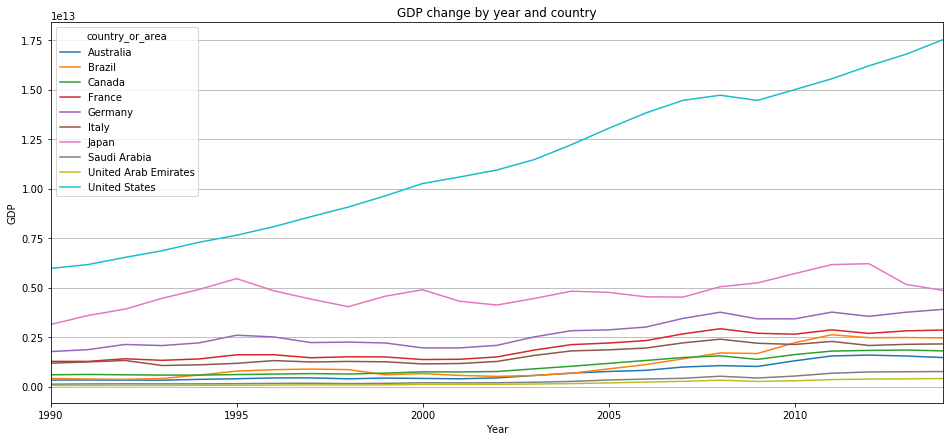

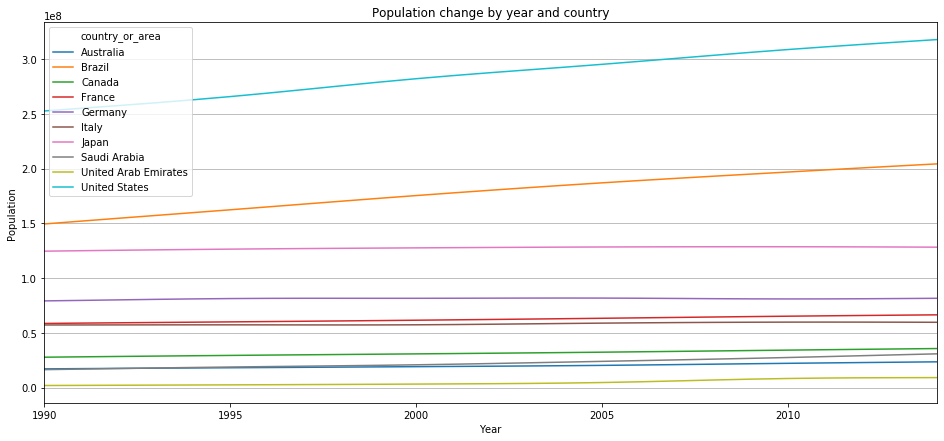

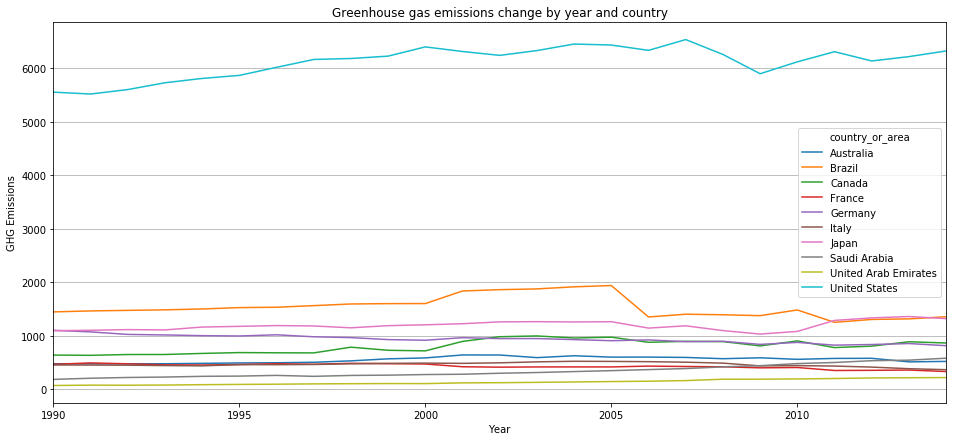

In [97]:
fig, ax = plt.subplots(figsize=(16,7))
top_10_df["gdp_usd"].unstack().plot(ax=ax)
plt.title("GDP change by year and country")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid(axis= "y", linestyle= "-")
plt.show()
fig, ax = plt.subplots(figsize=(16,7))
top_10_df["population"].unstack().plot(ax=ax)
plt.title("Population change by year and country")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(axis= "y", linestyle= "-")
plt.show()
fig, ax = plt.subplots(figsize=(16,7))
top_10_df["mtco2e"].unstack().plot(ax=ax)
plt.title("Greenhouse gas emissions change by year and country")
plt.xlabel("Year")
plt.ylabel("GHG Emissions")
plt.grid(axis= "y", linestyle= "-")
plt.show()

Looking at tables above that the biggest gdp per person per million tons of CO2 equivalent is USA. With the exception of Brazil and USA from those top 10 the population growth is mostly flat. Germany seems to be a good example since it's the only country which decreased it's GHG emissions while staying flat as population and increasing it's GDP in the same time.

### 4.3 Data with energy consumption

Here comes the interesting part. What happens when we add energy consumed for the GDP and GHG emissions produced per person?

In [98]:
energy_merged_data_2014 = energy_merged_data[energy_merged_data.year == 2014]

In [99]:
energy_merged_data_2014.nlargest(10, "gdp_pp_pjoul_mtco2e")

,country_or_area,year,gdp_usd,population,mtco2e,gdp_pp_pco2,petajoules,footnotes,gdp_pp_pjoul_mtco2e
2479,Iceland,2014,1.775809e+10,328459.0,2.73,1.475971e+05,311.0,NaN,6.159037e+06
4004,Norway,2014,4.993385e+11,5140311.0,24.94,2.422714e+06,1202.0,Including Svalbard and Jan Mayen Islands.,4.681809e+06
5203,Sweden,2014,5.744131e+11,9689376.0,46.91,2.780955e+06,2000.0,NaN,2.527511e+06
5228,Switzerland,2014,7.091826e+11,8229629.0,46.15,3.976944e+06,1043.0,Including Liechtenstein.,1.947558e+06
4354,Qatar,2014,2.062246e+11,2374419.0,88.11,7.652588e+06,1822.0,NaN,1.796000e+06
3154,Luxembourg,2014,6.610385e+10,556316.0,10.81,1.284491e+06,161.0,NaN,1.769723e+06
2979,Latvia,2014,3.133506e+10,2016125.0,1.84,2.859769e+04,182.0,NaN,1.537329e+06
2054,France,2014,2.852166e+12,66380854.0,334.28,1.436291e+07,10175.0,Including Monaco.,1.307844e+06
4779,Singapore,2014,3.115518e+11,5448342.0,52.42,2.997526e+06,1142.0,NaN,1.245762e+06
1984,Finland,2014,2.726093e+11,5459717.0,65.24,3.257500e+06,1415.0,NaN,1.082961e+06


Similarly to the above let's have a look at the GDP, population, GHG emissions and the energy consumed for those 10 countries.

In [100]:
energy_merged_data.corr()

,year,gdp_usd,population,mtco2e,gdp_pp_pco2,petajoules,gdp_pp_pjoul_mtco2e
year,1.000000,0.077761,0.021604,0.013027,0.045556,0.023581,0.012489
gdp_usd,0.077761,1.000000,0.365608,0.955484,0.959259,0.959283,0.058683
population,0.021604,0.365608,1.000000,0.550732,0.244955,0.822359,-0.012518
mtco2e,0.013027,0.955484,0.550732,1.000000,0.874768,0.998513,-0.012586
gdp_pp_pco2,0.045556,0.959259,0.244955,0.874768,1.000000,0.717507,0.052279
petajoules,0.023581,0.959283,0.822359,0.998513,0.717507,1.000000,0.033818
gdp_pp_pjoul_mtco2e,0.012489,0.058683,-0.012518,-0.012586,0.052279,0.033818,1.000000


In [101]:
efficient_top_10_list = list(energy_merged_data_2014.nlargest(10, "gdp_pp_pjoul_mtco2e").country_or_area.unique())
efficient_merged_data_top_10 = energy_merged_data[energy_merged_data.country_or_area.isin(efficient_top_10_list)]
efficient_top_10_df = efficient_merged_data_top_10.groupby(["year","country_or_area"]).sum()


#In the energy dataset there were missing years, so I'm going to put only the existing ones in a new df.
energy_years_list = list(energy_supply.year.unique())
avail_years_df = efficient_merged_data_top_10[efficient_merged_data_top_10.year.isin(energy_years_list)]
avail_years_top_10_df = avail_years_df.groupby(["year","country_or_area"]).sum()

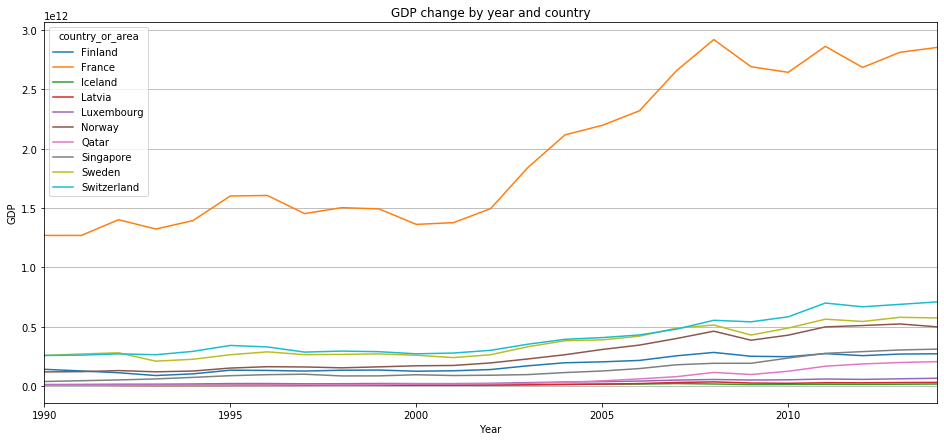

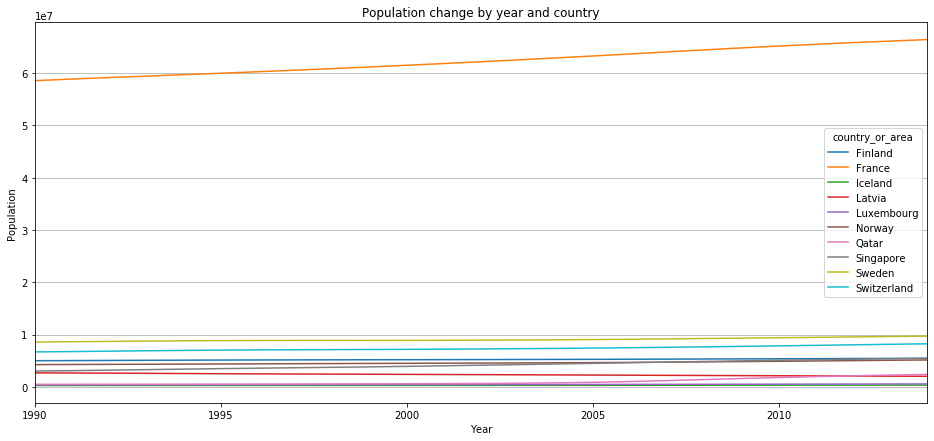

In [102]:
fig, ax = plt.subplots(figsize=(16,7))
efficient_top_10_df["gdp_usd"].unstack().plot(ax=ax)
plt.title("GDP change by year and country")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid(axis= "y", linestyle= "-")
plt.show()
fig, ax = plt.subplots(figsize=(16,7))
efficient_top_10_df["population"].unstack().plot(ax=ax)
plt.title("Population change by year and country")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(axis= "y", linestyle= "-")
plt.show()

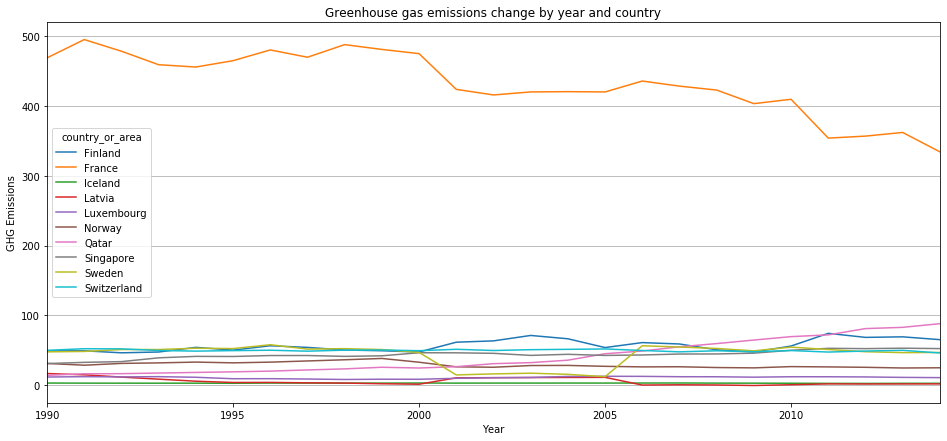

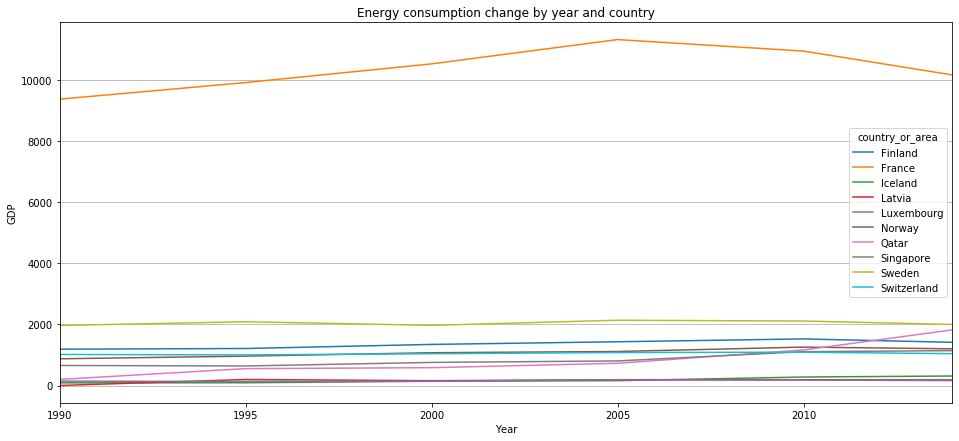

In [103]:
fig, ax = plt.subplots(figsize=(16,7))
efficient_top_10_df["mtco2e"].unstack().plot(ax=ax)
plt.title("Greenhouse gas emissions change by year and country")
plt.xlabel("Year")
plt.ylabel("GHG Emissions")
plt.grid(axis= "y", linestyle= "-")
plt.show()
fig, ax = plt.subplots(figsize=(16,7))
avail_years_top_10_df["petajoules"].unstack().plot(ax=ax)
plt.title("Energy consumption change by year and country")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.grid(axis= "y", linestyle= "-")
plt.show()

General trends: Rising GDP, flat population, ghg emissions and energy consumption.
I'm going to disregard Qatar - it's the fourth biggest natural gas producer (2017), has small population, natural gas is comparatively less poluting energy resource. (thank you, Wikipedia!)
Interestingly France is doing great on all factors. Significant ghg emissions reduction, great GDP growth, healthy population growth and it successfully managed to decrease it's energy consumption.

For Iceland it is known that it's on the border between two tectonic plates, therefore there are many opportunities for energy production(and consumption) from geothermal and hydro sources. France is famous with it's nuclear sector (which doesn't produce any GHG emissions, but it has other problems). Big chunk of Norway's energy is hydroelectricity. (thanks you, Google!)

## 5. Conclusion

To sum it up. The current world trend is that GDP growth has a strong positive correlation to the amounts of greenhouse gases emitted and to the energy consumed on our planet. The most energy efficient, economically well off countries are the nordics and France. Iceland, Norway, Sweden, France are the countries which policy makers (and every person) should turn their attention to when talking about increasing the well-being (in terms of climate and energy sustainability and economic growth) of every citizen of our planet.

## 6. References:

1. GDP per capita at current prices in USD from UN
 https://unstats.un.org/unsd/snaama/Basic
2. Population data from the same link above
3. All greenhouse gas data from Climatewatch.org  
https://www.climatewatchdata.org/data-explorer/historical-emissions?historical-emissions-data-sources=42&historical-emissions-end_year=2014&historical-emissions-gases=177&historical-emissions-regions=All%20Selected%2CWORLD&historical-emissions-sectors=509&historical-emissions-start_year=1990&page=1
4. International Energy Statistics from Kaggle pulled from United Nations Statistics Devision's  https://www.kaggle.com/unitednations/international-energy-statistics
5. Energy production, trade and consumption of UN from http://data.un.org/
6. A multi-factor efficiency perspective to the relationships among world GDP, energy consumption and carbon dioxide emissions available at https://www.sciencedirect.com/science/article/pii/S0040162505001861
7. Monitoring changes in economy-wide energy efficiency: From energy–GDP ratio to composite efficiency index avaialable at https://www.sciencedirect.com/science/article/pii/S0301421505003125#!